<a href="https://colab.research.google.com/github/juliakatsoulis/Portfolio/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression ans SVM

### **Evaluation Metrics of Classifiers:**

- Average loss of an epoch:
    \begin{align}
	  \frac{1}{B}\sum_{b=1}^B\sum_{d=1}^{D_b}\frac{loss(y_{bd}, f(x_{bd}))}{D_b}
	  \end{align}
    for each training epoch
    
    - $B$: the total number of batches
    - $D_b$: the number of observations in $b$-th batch
    - $f$: the model (Logistic regression or Linear SVM or MLP or CNN)
    - loss: logistic loss or the loss of linear SVM or cross-entropy
    - $(x_{bd}, y_{bd})$: the $d$-th pair of input data and label in $b$-th batch
    - An epoch is defined as one iteration over all observations in the training dataset

- Testing accuracy:
	\begin{align}
	\frac{1}{N}\sum_{i=1}^N {\bf 1}(\hat{y}_i=y_i)
	\end{align}
    - $N$: the total number of samples in the testing set
    - $y_i$: true label of sample $i$
    - $\hat{y}_i$: predicted label by the model

## Implementing LR and SVM using Pytorch

Here, I implemented Linear SVM and Logistic Regression to classify **handwritten digit 0 and 1** using a MNIST digit classification dataset.

In [ ]:
#Data Import
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
batch_size = 64
data_dir = './data'

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torch.utils.data as td
import random, time
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

#BINARY TRAIN/TEST DATA

train_data = datasets.MNIST(data_dir, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

test_data = datasets.MNIST(data_dir, train=False, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

subset_indices = ((train_data.targets == 0) + (train_data.targets == 1)).nonzero()
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))


subset_indices = ((test_data.targets == 0) + (test_data.targets == 1)).nonzero()
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))

### **Logistic Regression** with Pytorch to do handwritten digit 0 vs. 1 classification. Optimization with SGD.

In [ ]:
#Implementation of Logistic Regression
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()

        self.fc = nn.Linear(28*28, 1)

    def forward(self, x):
        return self.fc(x)

mod = LogisticRegressionModel()
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(mod.parameters(), lr=0.01)

num_epochs = 10
epoch_losses_1 = []

for epoch in range(num_epochs):
    mod.train()
    total_loss = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        labels = labels.float().unsqueeze(1)

        optimizer.zero_grad()
        output = mod(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    epoch_loss = total_loss/len(train_loader)
    epoch_losses_1.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/10], Loss: 0.0396
Epoch [2/10], Loss: 0.0116
Epoch [3/10], Loss: 0.0087
Epoch [4/10], Loss: 0.0073
Epoch [5/10], Loss: 0.0064
Epoch [6/10], Loss: 0.0058
Epoch [7/10], Loss: 0.0054
Epoch [8/10], Loss: 0.0050
Epoch [9/10], Loss: 0.0047
Epoch [10/10], Loss: 0.0045


### Below is the **Average loss of an epoch** for every epoch found by generating the Average Loss vs. Epoch plot.

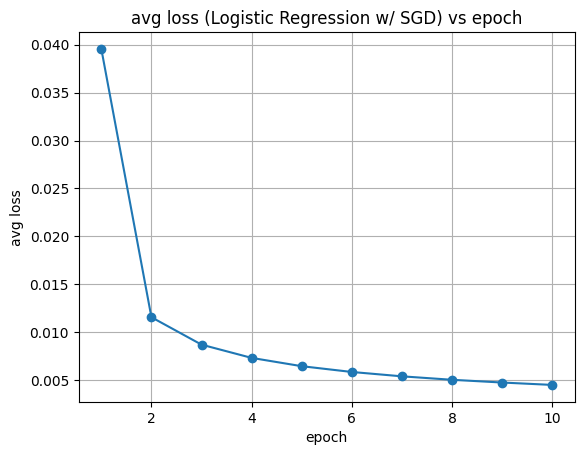

In [ ]:
plt.plot(range(1, num_epochs+1), epoch_losses_1, marker='o', linestyle='-')
plt.xlabel('epoch')
plt.ylabel("avg loss")
plt.title('avg loss (Logistic Regression w/ SGD) vs epoch')
plt.grid()

### the final testing accuracy of trained model.

In [ ]:
mod.eval()
accurate = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        labels = (labels ==1).float()
        outputs = mod(images).squeeze()
        predictions = (torch.sigmoid(outputs) > 0.5).float()
        accurate += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = 100*accurate/total
print("test accuracy:", accuracy)

test accuracy: 99.90543735224587


### Next, I did optimization with SGD-Momentum. I generated Average Loss vs. Epoch plot.

Epoch [1/10], Loss: 0.0162
Epoch [2/10], Loss: 0.0044
Epoch [3/10], Loss: 0.0031
Epoch [4/10], Loss: 0.0026
Epoch [5/10], Loss: 0.0022
Epoch [6/10], Loss: 0.0020
Epoch [7/10], Loss: 0.0018
Epoch [8/10], Loss: 0.0017
Epoch [9/10], Loss: 0.0016
Epoch [10/10], Loss: 0.0014
test accuracy: 99.90543735224587


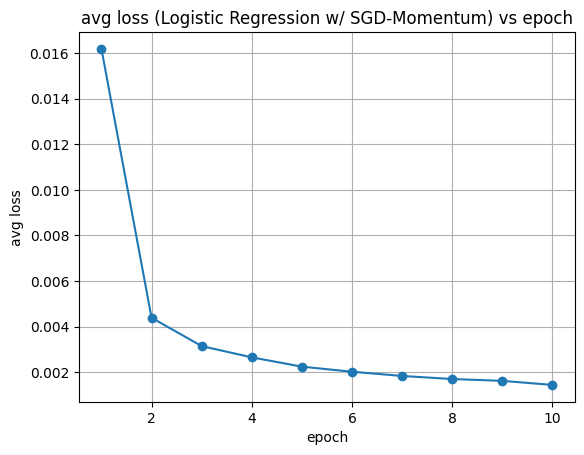

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()

        self.fc = nn.Linear(28*28, 1)

    def forward(self, x):
        return self.fc(x)

mod2 = LogisticRegressionModel()
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(mod2.parameters(), lr=0.01, momentum=0.9)

num_epochs = 10
epoch_losses_m = []

for epoch in range(num_epochs):
    mod2.train()
    total_loss = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        labels = labels.float().unsqueeze(1)

        optimizer.zero_grad()
        output = mod2(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    epoch_loss = total_loss/len(train_loader)
    epoch_losses_m.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")


plt.plot(range(1, num_epochs+1), epoch_losses_m, marker='o', linestyle='-')
plt.xlabel('epoch')
plt.ylabel("avg loss")
plt.title('avg loss (Logistic Regression w/ SGD-Momentum) vs epoch')
plt.grid()

mod2.eval()
accurate = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        labels = (labels ==1).float()
        outputs = mod2(images).squeeze()
        predictions = (torch.sigmoid(outputs) > 0.5).float()
        accurate += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = 100*accurate/total
print("test accuracy:", accuracy)

The SGD + Momentum converges faster. You can tell based on the first few epochs. Thus, it learns faster and ends with a lower final loss.

### Then, I tried different step sizes.

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()

        self.fc = nn.Linear(28*28, 1)

    def forward(self, x):
        return self.fc(x)

mod = LogisticRegressionModel()
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(mod.parameters(), lr=0.0001)

num_epochs = 10
epoch_losses_lo = []

for epoch in range(num_epochs):
    mod.train()
    total_loss = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        labels = labels.float().unsqueeze(1)

        optimizer.zero_grad()
        output = mod(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    epoch_loss = total_loss/len(train_loader)
    epoch_losses_lo.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

mod.eval()
accurate = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        labels = (labels ==1).float()
        outputs = mod(images).squeeze()
        predictions = (torch.sigmoid(outputs) > 0.5).float()
        accurate += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = 100*accurate/total
print("test accuracy:", accuracy)

Epoch [1/10], Loss: 0.5203
Epoch [2/10], Loss: 0.2716
Epoch [3/10], Loss: 0.1842
Epoch [4/10], Loss: 0.1410
Epoch [5/10], Loss: 0.1153
Epoch [6/10], Loss: 0.0983
Epoch [7/10], Loss: 0.0861
Epoch [8/10], Loss: 0.0770
Epoch [9/10], Loss: 0.0699
Epoch [10/10], Loss: 0.0642
test accuracy: 99.76359338061465


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()

        self.fc = nn.Linear(28*28, 1)

    def forward(self, x):
        return self.fc(x)

mod = LogisticRegressionModel()
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(mod.parameters(), lr=1)

num_epochs = 10
epoch_losses_hi = []

for epoch in range(num_epochs):
    mod.train()
    total_loss = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        labels = labels.float().unsqueeze(1)

        optimizer.zero_grad()
        output = mod(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    epoch_loss = total_loss/len(train_loader)
    epoch_losses_hi.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

mod.eval()
accurate = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        labels = (labels ==1).float()
        outputs = mod(images).squeeze()
        predictions = (torch.sigmoid(outputs) > 0.5).float()
        accurate += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = 100*accurate/total
print("test accuracy:", accuracy)

Epoch [1/10], Loss: 0.0449
Epoch [2/10], Loss: 0.0123
Epoch [3/10], Loss: 0.0056
Epoch [4/10], Loss: 0.0027
Epoch [5/10], Loss: 0.0021
Epoch [6/10], Loss: 0.0003
Epoch [7/10], Loss: 0.0002
Epoch [8/10], Loss: 0.0001
Epoch [9/10], Loss: 0.0001
Epoch [10/10], Loss: 0.0001
test accuracy: 99.90543735224587


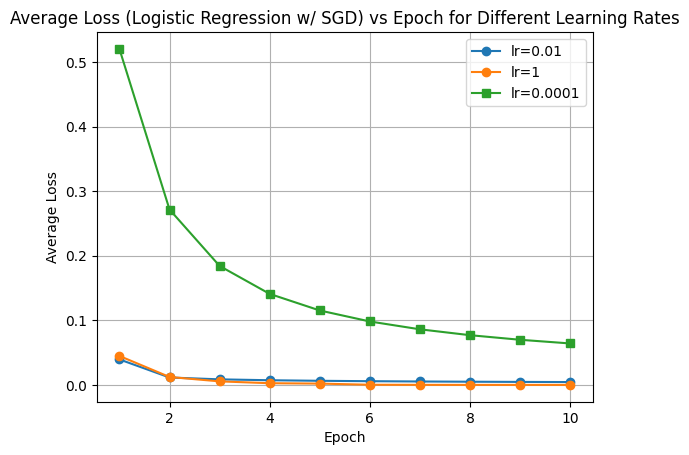

In [ ]:
plt.plot(range(1, num_epochs + 1), epoch_losses_1 , marker='o', linestyle='-', label='lr=0.01')
plt.plot(range(1, num_epochs + 1), epoch_losses_hi, marker='o', linestyle='-', label='lr=1')
plt.plot(range(1, num_epochs + 1), epoch_losses_lo, marker='s', linestyle='-', label='lr=0.0001')

plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Average Loss (Logistic Regression w/ SGD) vs Epoch for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

Step Size 0.0001 is too small. It decreases slowly, meaning the model learns by taking many epochs. It's accurate. Just inefficient for quick convergence.

Step size 1 suprisingly works super well and is very similar in behavior to the lr=0,05. The model with this step size actually learns faster than the other two.

### I implemented **Linear SVM** with Pytorch to do handwritten digit 0 vs. 1 classification. Optimization with SGD.

In [ ]:
#Implementation of Linear SVM

class LinearSVM(nn.Module):
    def __init__(self):
        super(LinearSVM, self).__init__()
        self.fc = nn.Linear(28*28, 1, bias=False)

    def forward(self, x):
        return self.fc(x)

svm_mod = LinearSVM()
optimizer = optim.SGD(svm_mod.parameters(), lr=0.005, weight_decay=0.01)

def hinge_loss(outputs, labels):
    return torch.mean(torch.clamp(1-labels*outputs, min=0))

num_epochs = 10
epoch_losses_svm = []

for epoch in range(num_epochs):
    svm_mod.train()
    total_loss = 0

    for images, labels in train_loader:
        images = images.view(-1, 28*28)
        labels = (labels *2 - 1).float().unsqueeze(1)

        optimizer.zero_grad()
        output = svm_mod(images)
        loss = hinge_loss(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    epoch_loss = total_loss/len(train_loader)
    epoch_losses_svm.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/10], Loss: 0.0159
Epoch [2/10], Loss: 0.0054
Epoch [3/10], Loss: 0.0046
Epoch [4/10], Loss: 0.0041
Epoch [5/10], Loss: 0.0037
Epoch [6/10], Loss: 0.0034
Epoch [7/10], Loss: 0.0032
Epoch [8/10], Loss: 0.0031
Epoch [9/10], Loss: 0.0029
Epoch [10/10], Loss: 0.0028


### The **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot.

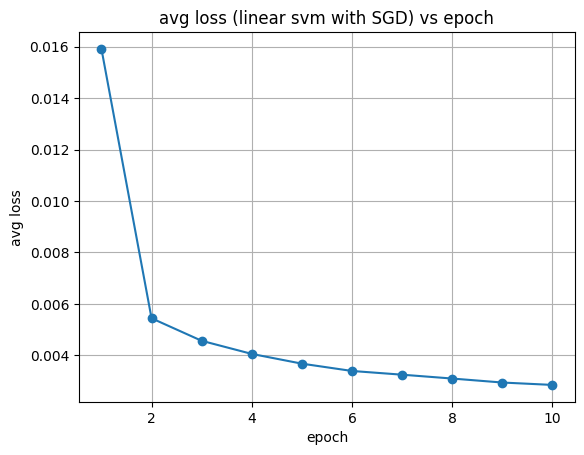

In [ ]:
plt.plot(range(1, num_epochs+1), epoch_losses_svm, marker='o', linestyle='-')
plt.xlabel('epoch')
plt.ylabel("avg loss")
plt.title('avg loss (linear svm with SGD) vs epoch')
plt.grid()

### The final testing accuracy of trained model.

In [ ]:
svm_mod.eval()
accurate = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        labels = (labels * 2 - 1).float().unsqueeze(1)
        outputs = svm_mod(images)
        predictions = torch.sign(outputs)
        accurate += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = 100*accurate/total
print("test accuracy:", accuracy)

test accuracy: 99.90543735224587


### Optimization with SGD-Momentum. Generated Average Loss vs. Epoch plot. Reported the testing accuracy.

Epoch [1/10], Loss: 0.0151
Epoch [2/10], Loss: 0.0041
Epoch [3/10], Loss: 0.0030
Epoch [4/10], Loss: 0.0023
Epoch [5/10], Loss: 0.0020
Epoch [6/10], Loss: 0.0017
Epoch [7/10], Loss: 0.0015
Epoch [8/10], Loss: 0.0015
Epoch [9/10], Loss: 0.0016
Epoch [10/10], Loss: 0.0015
test accuracy: 99.95271867612293


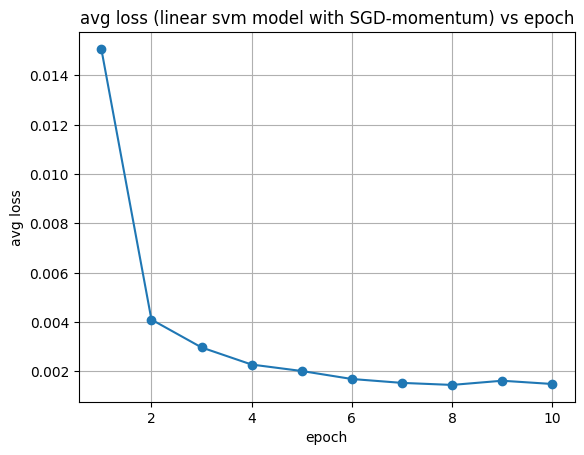

In [ ]:
class LinearSVM(nn.Module):
    def __init__(self):
        super(LinearSVM, self).__init__()
        self.fc = nn.Linear(28*28, 1, bias=False)

    def forward(self, x):
        return self.fc(x)

svm_mod = LinearSVM()
optimizer = optim.SGD(svm_mod.parameters(), lr=0.005, momentum=0.9, weight_decay=0.01)

def hinge_loss(outputs, labels):
    return torch.mean(torch.clamp(1-labels*outputs, min=0))

num_epochs = 10
epoch_losses = []

for epoch in range(num_epochs):
    svm_mod.train()
    total_loss = 0

    for images, labels in train_loader:
        images = images.view(-1, 28*28)
        labels = (labels *2 - 1).float().unsqueeze(1)

        optimizer.zero_grad()
        output = svm_mod(images)
        loss = hinge_loss(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    epoch_loss = total_loss/len(train_loader)
    epoch_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

svm_mod.eval()
accurate = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        labels = (labels * 2 - 1).float().unsqueeze(1)
        outputs = svm_mod(images)
        predictions = torch.sign(outputs)
        accurate += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = 100*accurate/total
print("test accuracy:", accuracy)

plt.plot(range(1, num_epochs+1), epoch_losses, marker='o', linestyle='-')
plt.xlabel('epoch')
plt.ylabel("avg loss")
plt.title('avg loss (linear svm model with SGD-momentum) vs epoch')
plt.grid()

SGD-Momentum leads to faster convergence with a slightly better accuracy. It is clear that loss in the first few epochs drops much faster than with standard SGD. Momentum helps get the last 0.04% boost on the accuracy. In epoch 8, the SGD-M fluctuates slightly, but this is likely due to momentum overshooting before stabilizing.

### I tried different step sizes.

In [ ]:

class LinearSVM(nn.Module):
    def __init__(self):
        super(LinearSVM, self).__init__()
        self.fc = nn.Linear(28*28, 1, bias=False)

    def forward(self, x):
        return self.fc(x)

svm_mod_high = LinearSVM()
optimizer = optim.SGD(svm_mod_high.parameters(), lr=1, weight_decay=0.01)

def hinge_loss(outputs, labels):
    return torch.mean(torch.clamp(1-labels*outputs, min=0))

num_epochs = 10
epoch_losses_high = []

for epoch in range(num_epochs):
    svm_mod_high.train()
    total_loss = 0

    for images, labels in train_loader:
        images = images.view(-1, 28*28)
        labels = (labels *2 - 1).float().unsqueeze(1)

        optimizer.zero_grad()
        output = svm_mod_high(images)
        loss = hinge_loss(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    epoch_loss = total_loss/len(train_loader)
    epoch_losses_high.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

svm_mod_high.eval()
accurate = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        labels = (labels * 2 - 1).float().unsqueeze(1)
        outputs = svm_mod_high(images)
        predictions = torch.sign(outputs)
        accurate += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = 100*accurate/total
print("test accuracy:", accuracy)

Epoch [1/10], Loss: 0.0372
Epoch [2/10], Loss: 0.0126
Epoch [3/10], Loss: 0.0140
Epoch [4/10], Loss: 0.0514
Epoch [5/10], Loss: 0.0151
Epoch [6/10], Loss: 0.0361
Epoch [7/10], Loss: 0.0117
Epoch [8/10], Loss: 0.0153
Epoch [9/10], Loss: 0.0077
Epoch [10/10], Loss: 0.0250
test accuracy: 99.76359338061465


In [ ]:

class LinearSVM(nn.Module):
    def __init__(self):
        super(LinearSVM, self).__init__()
        self.fc = nn.Linear(28*28, 1, bias=False)

    def forward(self, x):
        return self.fc(x)

svm_mod_low = LinearSVM()
optimizer = optim.SGD(svm_mod_low.parameters(), lr=0.0001, weight_decay=0.01)

def hinge_loss(outputs, labels):
    return torch.mean(torch.clamp(1-labels*outputs, min=0))

num_epochs = 10
epoch_losses_low = []

for epoch in range(num_epochs):
    svm_mod_low.train()
    total_loss = 0

    for images, labels in train_loader:
        images = images.view(-1, 28*28)
        labels = (labels *2 - 1).float().unsqueeze(1)

        optimizer.zero_grad()
        output = svm_mod_low(images)
        loss = hinge_loss(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    epoch_loss = total_loss/len(train_loader)
    epoch_losses_low.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

svm_mod_low.eval()
accurate = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        labels = (labels * 2 - 1).float().unsqueeze(1)
        outputs = svm_mod_low(images)
        predictions = torch.sign(outputs)
        accurate += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = 100*accurate/total
print("test accuracy:", accuracy)

Epoch [1/10], Loss: 0.2860
Epoch [2/10], Loss: 0.0609
Epoch [3/10], Loss: 0.0395
Epoch [4/10], Loss: 0.0308
Epoch [5/10], Loss: 0.0258
Epoch [6/10], Loss: 0.0225
Epoch [7/10], Loss: 0.0202
Epoch [8/10], Loss: 0.0184
Epoch [9/10], Loss: 0.0170
Epoch [10/10], Loss: 0.0159
test accuracy: 99.76359338061465


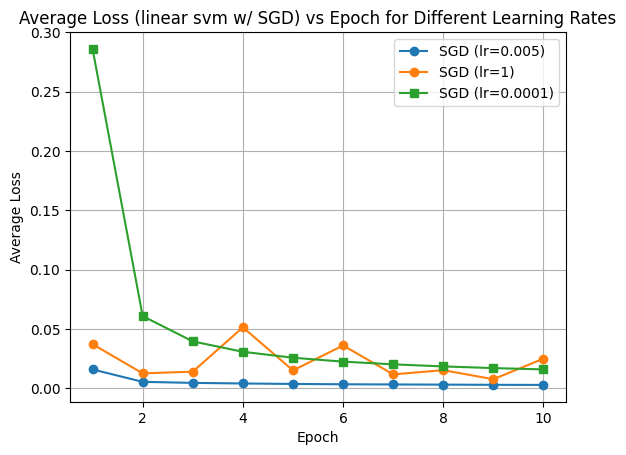

In [ ]:
plt.plot(range(1, num_epochs + 1), epoch_losses_svm , marker='o', linestyle='-', label='SGD (lr=0.005)')
plt.plot(range(1, num_epochs + 1), epoch_losses_high, marker='o', linestyle='-', label='SGD (lr=1)')
plt.plot(range(1, num_epochs + 1), epoch_losses_low, marker='s', linestyle='-', label='SGD (lr=0.0001)')

plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Average Loss (linear svm w/ SGD) vs Epoch for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

Step Size 1, the loss shows fluctuations, but the test accuracy is the same as a step size with 0.005. The learning rate is likely too high which is causing the optimizer to overshoot the optimal minimum. It's unstable.

Step size 0.0001, the loss decreases steadily and the model achieves the lowest accuracy. The smaller learning rate leads to a more controlled update between epochs. The model has samll convergence.

Step Size 0.005, has a moderate initial loss and shows a steady and smooth convergence to a low loss. It's likely the best choice for stability and effecive convergence.